In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importação das bibliotecas necessárias

In [8]:
import pandas as pd
import plotly.express as px #Criação de gráficos dinámicos
import seaborn as sns #Biblioteca para gráficos
import numpy as np #funções matemáticas de alto nível


#Abrindo o arquivo com o conteúdo

In [9]:
horas_estudo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS CIENT DADOS - XP/MÓDULO 1/TPM1/horas_estudo.csv', sep = ';',decimal = ',')


#Visualizando o arquivo

In [10]:
horas_estudo.head()

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30


In [11]:
print(type(horas_estudo))

<class 'pandas.core.frame.DataFrame'>


In [12]:
#Verificação de duplicatas
duplicadas=horas_estudo.duplicated()
print("Linhas duplicadas")
print(horas_estudo[duplicadas])

Linhas duplicadas
     horas_estudo  nota_avaliacao
100         37.13           93.04
101         24.21           52.53
102         11.53           61.20
103         10.63           44.54
104          9.75           52.48
105         31.34           75.16
106          0.38           10.30
107          0.41           15.52
108         18.31           44.72
109         39.08          100.00
110         28.86           80.07
111         15.99           50.49
112         12.62           54.03
113          5.27           64.15
114         29.05           62.44
115         33.92           90.91
116         15.55           86.84
117         37.56           94.71
118          6.22           34.24
119         12.71           48.54
120         36.25           93.54
121          5.59           56.66
122         34.18           90.90


In [13]:
#removendo duplicadas
horas_estudo = horas_estudo.drop_duplicates(subset=['horas_estudo','nota_avaliacao'])
horas_estudo.describe()

,horas_estudo,nota_avaliacao
count,100.000000,100.000000
mean,20.766000,64.222600
std,10.731428,22.000436
min,0.380000,10.300000
25%,13.287500,47.505000
50%,19.815000,62.380000
75%,29.767500,84.540000
max,39.160000,100.000000


In [42]:
#verificando dados nulos
nulos=horas_estudo.isnull()
cont_nulos=nulos.sum().sum()
print("Número total de dados nulos: ",cont_nulos)

Número total de dados nulos:  0


#Criação das variáveis do modelo
custo da diária de um imóvel baseado no número de pessoas
--
independente = qtd pessoas

dependente = valor diária

---

nota de um aluno baseado nas horas de estudo
--
indepentende = hora de estudo

dependente = nota

In [15]:
#variável independente
x_horasestudo = horas_estudo.iloc[:,0].values
x_horasestudo

array([16.07, 20.41, 34.29, 34.1 , 32.34,  7.3 ,  3.37, 17.74, 33.36,
       17.78, 15.79, 13.48, 25.78, 16.03, 31.69, 30.72, 13.9 , 17.85,
       35.18,  3.95,  9.03, 22.69, 19.7 , 18.06, 14.58, 18.12, 13.58,
       31.22, 21.88, 17.35, 10.3 , 37.13, 24.21, 11.53, 10.63,  9.75,
       31.34,  0.38,  0.41, 18.31, 39.08, 28.86, 15.99, 12.62,  5.27,
       29.05, 33.92, 15.55, 37.56,  6.22, 12.71, 36.25,  5.59, 34.18,
       37.7 , 16.22, 14.14, 27.02, 22.79, 29.71, 27.79, 27.17, 11.88,
       21.27, 24.66, 19.43, 37.76, 38.47, 24.08, 26.57, 28.53, 21.28,
       15.83,  1.01, 16.25, 33.25, 16.3 , 30.74, 34.9 , 34.09, 29.94,
       26.46, 10.24, 38.91, 10.61,  5.66,  4.  , 18.91, 39.16, 25.79,
       29.35, 15.25, 26.14,  5.06, 20.32,  6.08,  1.58,  8.39, 19.93,
       21.8 ])

In [16]:
#variável dependente
y_horasestudo = horas_estudo.iloc[:,1].values
y_horasestudo

array([ 40.05,  66.49,  91.5 ,  87.09,  69.3 ,  90.59,  32.18,  55.02,
        75.06,  42.14,  41.35,  55.78,  55.81,  37.61,  59.02,  30.14,
        32.66,  47.77,  84.16,  30.93,  55.38,  32.53,  40.73,  62.32,
        55.21,  50.97,  60.25,  38.83,  75.56,  56.62,  42.21,  93.04,
        52.53,  61.2 ,  44.54,  52.48,  75.16,  10.3 ,  15.52,  44.72,
       100.  ,  80.07,  50.49,  54.03,  64.15,  62.44,  90.91,  86.84,
        94.71,  34.24,  48.54,  93.54,  56.66,  90.9 ,  79.19,  46.18,
        46.71,  74.56,  75.93,  87.5 ,  94.12,  99.22,  56.11,  42.89,
        88.95,  87.33,  95.8 ,  94.92,  73.63,  74.64,  66.14,  51.53,
        35.42,  34.47,  69.88,  82.41,  36.87,  80.71,  96.18,  92.91,
        92.72,  79.59,  85.68,  97.39,  51.88,  37.93,  58.96,  72.65,
        99.09,  71.16,  96.76,  68.13,  51.89,  76.03,  70.66,  92.89,
        51.01,  32.46,  52.92,  65.99])

#Transformando para matriz

In [17]:
np.corrcoef(x_horasestudo,y_horasestudo)

array([[1.        , 0.65975872],
       [0.65975872, 1.        ]])

# Correlação

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

<Axes: >

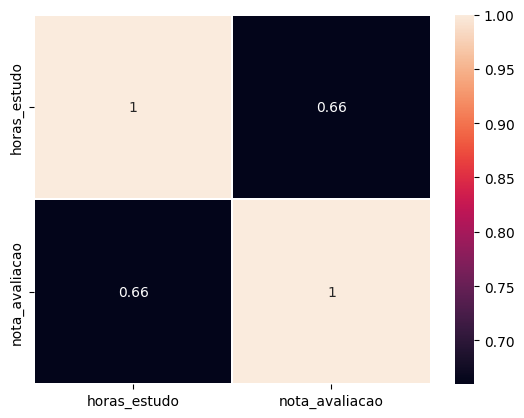

In [18]:
correl = horas_estudo.corr()
#plot da matriz da correção
plot = sns.heatmap(correl, annot=True, linewidths=.3)
plot

A correlação não é muito forte. Indica uma leve tendência de as horas de estudos influnciarem na nota.

#Tratando os dados para o modelo
Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada.

In [19]:
#visualizando formato das variáveis
x_horasestudo
#foi convertido em matriz para fazermos o heatmap

array([16.07, 20.41, 34.29, 34.1 , 32.34,  7.3 ,  3.37, 17.74, 33.36,
       17.78, 15.79, 13.48, 25.78, 16.03, 31.69, 30.72, 13.9 , 17.85,
       35.18,  3.95,  9.03, 22.69, 19.7 , 18.06, 14.58, 18.12, 13.58,
       31.22, 21.88, 17.35, 10.3 , 37.13, 24.21, 11.53, 10.63,  9.75,
       31.34,  0.38,  0.41, 18.31, 39.08, 28.86, 15.99, 12.62,  5.27,
       29.05, 33.92, 15.55, 37.56,  6.22, 12.71, 36.25,  5.59, 34.18,
       37.7 , 16.22, 14.14, 27.02, 22.79, 29.71, 27.79, 27.17, 11.88,
       21.27, 24.66, 19.43, 37.76, 38.47, 24.08, 26.57, 28.53, 21.28,
       15.83,  1.01, 16.25, 33.25, 16.3 , 30.74, 34.9 , 34.09, 29.94,
       26.46, 10.24, 38.91, 10.61,  5.66,  4.  , 18.91, 39.16, 25.79,
       29.35, 15.25, 26.14,  5.06, 20.32,  6.08,  1.58,  8.39, 19.93,
       21.8 ])

In [20]:
x_horasestudo = x_horasestudo.reshape(-1,1)
x_horasestudo

array([[16.07],
       [20.41],
       [34.29],
       [34.1 ],
       [32.34],
       [ 7.3 ],
       [ 3.37],
       [17.74],
       [33.36],
       [17.78],
       [15.79],
       [13.48],
       [25.78],
       [16.03],
       [31.69],
       [30.72],
       [13.9 ],
       [17.85],
       [35.18],
       [ 3.95],
       [ 9.03],
       [22.69],
       [19.7 ],
       [18.06],
       [14.58],
       [18.12],
       [13.58],
       [31.22],
       [21.88],
       [17.35],
       [10.3 ],
       [37.13],
       [24.21],
       [11.53],
       [10.63],
       [ 9.75],
       [31.34],
       [ 0.38],
       [ 0.41],
       [18.31],
       [39.08],
       [28.86],
       [15.99],
       [12.62],
       [ 5.27],
       [29.05],
       [33.92],
       [15.55],
       [37.56],
       [ 6.22],
       [12.71],
       [36.25],
       [ 5.59],
       [34.18],
       [37.7 ],
       [16.22],
       [14.14],
       [27.02],
       [22.79],
       [29.71],
       [27.79],
       [27.17],
       [

#Aplicando os dados ao algoritmo de machine de regressão

In [21]:
from sklearn.linear_model import LinearRegression
previsao_nota = LinearRegression()

In [22]:
print(type(previsao_nota))

<class 'sklearn.linear_model._base.LinearRegression'>


#Treinamento do modelo

In [23]:
previsao_nota.fit(x_horasestudo,y_horasestudo)
print(previsao_nota.fit)

<bound method LinearRegression.fit of LinearRegression()>


In [24]:
#Interceptação
previsao_nota.intercept_

36.13518584017032

In [25]:
#Coeficiente angular da reta
previsao_nota.coef_

array([1.35256738])

In [26]:
#estimativa da nota
previsao_notas=previsao_nota.predict(x_horasestudo)
previsao_notas

array([57.8709436 , 63.74108601, 82.51472121, 82.25773341, 79.87721483,
       46.0089277 , 40.6933379 , 60.12973112, 81.25683355, 60.18383381,
       57.49222473, 54.36779409, 71.00437283, 57.8168409 , 78.99804603,
       77.68605567, 54.93587239, 60.27851353, 83.71850618, 41.47782698,
       48.34886926, 66.82493963, 62.78076318, 60.56255268, 55.8556182 ,
       60.64370672, 54.50305083, 78.36233936, 65.72936006, 59.60222984,
       50.06662983, 86.35601256, 68.88084205, 51.7302877 , 50.51297706,
       49.32271777, 78.52464745, 36.64916144, 36.68973846, 60.90069452,
       88.99351895, 75.17028035, 57.76273821, 53.20458614, 43.26321592,
       75.42726815, 82.01427128, 57.16760856, 86.93761654, 44.54815493,
       53.32631721, 85.16575327, 43.69603748, 82.3659388 , 87.12697597,
       58.0738287 , 55.26048856, 72.68155638, 66.96019637, 76.31996262,
       73.72303326, 72.88444149, 52.20368628, 64.90429396, 69.48949737,
       62.41556998, 87.20813001, 88.16845285, 68.70500829, 72.07

#Visualizando no gráfico as disposições dos dados
Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor

In [27]:
#verifcação do formato da variável
x_horasestudo

array([[16.07],
       [20.41],
       [34.29],
       [34.1 ],
       [32.34],
       [ 7.3 ],
       [ 3.37],
       [17.74],
       [33.36],
       [17.78],
       [15.79],
       [13.48],
       [25.78],
       [16.03],
       [31.69],
       [30.72],
       [13.9 ],
       [17.85],
       [35.18],
       [ 3.95],
       [ 9.03],
       [22.69],
       [19.7 ],
       [18.06],
       [14.58],
       [18.12],
       [13.58],
       [31.22],
       [21.88],
       [17.35],
       [10.3 ],
       [37.13],
       [24.21],
       [11.53],
       [10.63],
       [ 9.75],
       [31.34],
       [ 0.38],
       [ 0.41],
       [18.31],
       [39.08],
       [28.86],
       [15.99],
       [12.62],
       [ 5.27],
       [29.05],
       [33.92],
       [15.55],
       [37.56],
       [ 6.22],
       [12.71],
       [36.25],
       [ 5.59],
       [34.18],
       [37.7 ],
       [16.22],
       [14.14],
       [27.02],
       [22.79],
       [29.71],
       [27.79],
       [27.17],
       [

In [28]:
#conversão da variável de matriz para array
#x_horasestudo.ravel()
x_horasestudo.ravel()


array([16.07, 20.41, 34.29, 34.1 , 32.34,  7.3 ,  3.37, 17.74, 33.36,
       17.78, 15.79, 13.48, 25.78, 16.03, 31.69, 30.72, 13.9 , 17.85,
       35.18,  3.95,  9.03, 22.69, 19.7 , 18.06, 14.58, 18.12, 13.58,
       31.22, 21.88, 17.35, 10.3 , 37.13, 24.21, 11.53, 10.63,  9.75,
       31.34,  0.38,  0.41, 18.31, 39.08, 28.86, 15.99, 12.62,  5.27,
       29.05, 33.92, 15.55, 37.56,  6.22, 12.71, 36.25,  5.59, 34.18,
       37.7 , 16.22, 14.14, 27.02, 22.79, 29.71, 27.79, 27.17, 11.88,
       21.27, 24.66, 19.43, 37.76, 38.47, 24.08, 26.57, 28.53, 21.28,
       15.83,  1.01, 16.25, 33.25, 16.3 , 30.74, 34.9 , 34.09, 29.94,
       26.46, 10.24, 38.91, 10.61,  5.66,  4.  , 18.91, 39.16, 25.79,
       29.35, 15.25, 26.14,  5.06, 20.32,  6.08,  1.58,  8.39, 19.93,
       21.8 ])

In [29]:
#verifcação da outra variável
y_horasestudo

array([ 40.05,  66.49,  91.5 ,  87.09,  69.3 ,  90.59,  32.18,  55.02,
        75.06,  42.14,  41.35,  55.78,  55.81,  37.61,  59.02,  30.14,
        32.66,  47.77,  84.16,  30.93,  55.38,  32.53,  40.73,  62.32,
        55.21,  50.97,  60.25,  38.83,  75.56,  56.62,  42.21,  93.04,
        52.53,  61.2 ,  44.54,  52.48,  75.16,  10.3 ,  15.52,  44.72,
       100.  ,  80.07,  50.49,  54.03,  64.15,  62.44,  90.91,  86.84,
        94.71,  34.24,  48.54,  93.54,  56.66,  90.9 ,  79.19,  46.18,
        46.71,  74.56,  75.93,  87.5 ,  94.12,  99.22,  56.11,  42.89,
        88.95,  87.33,  95.8 ,  94.92,  73.63,  74.64,  66.14,  51.53,
        35.42,  34.47,  69.88,  82.41,  36.87,  80.71,  96.18,  92.91,
        92.72,  79.59,  85.68,  97.39,  51.88,  37.93,  58.96,  72.65,
        99.09,  71.16,  96.76,  68.13,  51.89,  76.03,  70.66,  92.89,
        51.01,  32.46,  52.92,  65.99])

In [30]:
grafico = px.scatter(x = x_horasestudo.ravel(),y = y_horasestudo)
grafico.show()

In [31]:
grafico = px.scatter(x = x_horasestudo.ravel(),y = y_horasestudo)
grafico.add_scatter(x = x_horasestudo.ravel(),y = previsao_notas, name = 'Previsão das notas conforme o tempo de estudo')

In [32]:
previsao_notas

array([57.8709436 , 63.74108601, 82.51472121, 82.25773341, 79.87721483,
       46.0089277 , 40.6933379 , 60.12973112, 81.25683355, 60.18383381,
       57.49222473, 54.36779409, 71.00437283, 57.8168409 , 78.99804603,
       77.68605567, 54.93587239, 60.27851353, 83.71850618, 41.47782698,
       48.34886926, 66.82493963, 62.78076318, 60.56255268, 55.8556182 ,
       60.64370672, 54.50305083, 78.36233936, 65.72936006, 59.60222984,
       50.06662983, 86.35601256, 68.88084205, 51.7302877 , 50.51297706,
       49.32271777, 78.52464745, 36.64916144, 36.68973846, 60.90069452,
       88.99351895, 75.17028035, 57.76273821, 53.20458614, 43.26321592,
       75.42726815, 82.01427128, 57.16760856, 86.93761654, 44.54815493,
       53.32631721, 85.16575327, 43.69603748, 82.3659388 , 87.12697597,
       58.0738287 , 55.26048856, 72.68155638, 66.96019637, 76.31996262,
       73.72303326, 72.88444149, 52.20368628, 64.90429396, 69.48949737,
       62.41556998, 87.20813001, 88.16845285, 68.70500829, 72.07

In [33]:
#Verificando as notas dependendo das horas de estudo
h_estudo = 25
previsao_nota.intercept_ + previsao_nota.coef_ * h_estudo

array([69.94937028])

In [34]:
previsao_nota.predict([[25]])

array([69.94937028])

#Diferença entre nota predita e real do aluno que estudou 18,06 horas

In [35]:
#Buscando a linha
hora_procurada = 18.06
linha = horas_estudo.loc[horas_estudo['horas_estudo']==hora_procurada]
linha

,horas_estudo,nota_avaliacao
23,18.06,62.32


In [36]:
#Retornando o número da linha
num_linha = linha.index[0]
num_linha

23

In [37]:
#Cálculo da diferença
dif_nota=abs(previsao_nota.predict([[hora_procurada]])-horas_estudo.iloc[num_linha,1])
dif_nota


array([1.75744732])

#Métricas

In [38]:
#indica a qualidade do algoritmo, quanto mais próximo de 1, melhor
previsao_nota.score(x_horasestudo, y_horasestudo)

0.43528156504806215

In [39]:
#visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_horasestudo, previsao_notas)
mse

270.601202088843

In [40]:
#calculando MAE
mean_absolute_error(y_horasestudo, previsao_notas)

12.83868977098035

In [41]:
#calculando o RMSE
np.sqrt(mse)

16.449960549765553